In [1]:
#add path to sys so that we can import functions from other folders
import sys
import os
sys.path.append(r"C:\Users\tfarotimi\United Nations\Contexto Proyecciones Sector Externo - ProyectoAutomatización\Dev\Inflation Forecasting\src")
sys.path.append(r"C:\Users\tfarotimi\United Nations\Contexto Proyecciones Sector Externo - ProyectoAutomatización\Dev\Inflation Forecasting\lib")


#import libraries 
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
import nbformat

import matplotlib.pyplot as plt
import seaborn as sns

#tqdm
from tqdm import tqdm

from monthly_forecast_run import run_monthly_forecast
from excel_forecast_report import create_forecast_report
from helper_functions import load_data


#scikit-learn
#randomforestregessor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score


from forestci import random_forest_error

#statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from models import arima, sarimax 

import pmdarima as pm
#from pm.arima import ADFTest


#import functions from modules
from helper_functions import load_data, prepare_data, prepare_forecast_data, format_results,step_forecast, time_delay_embedding, remove_pulses
from dashboard import model_compare, r2_compare, error_compare
from residuals_analysis import analyze_residuals
from forecast import get_forecast 
import armagarch as ag

#import modules
import importlib
import models
import helper_functions
import dashboard
import residuals_analysis
import forecast



#reload modules to ensure that changes made to them are reflected in the notebook
importlib.reload(models)
importlib.reload(helper_functions)
importlib.reload(dashboard)
importlib.reload(residuals_analysis)
importlib.reload(forecast)


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import datetime as dt

import regex as re

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)



KeyboardInterrupt: 

In [ ]:

today = dt.datetime.today().strftime('%Y-%m-%d')
month = dt.datetime.today().strftime('%B')
year = dt.datetime.today().strftime('%Y')
print(today)

#DATA_PATH = r"C:\Users\tfarotimi\United Nations\Contexto Proyecciones Sector Externo - ProyectoAutomatización\Dev\Inflation Forecasting\dat" + "/" + year + "/" + month + "/"

DATA_PATH = r"C:\Users\tfarotimi\United Nations\Contexto Proyecciones Sector Externo - ProyectoAutomatización\Dev\Inflation Forecasting\dat" + "/" + '2023' + "/" + 'August' + "/"

#load data

countries = ['ARG', 'BRA', 'CHL', 'MEX']

country_data = {}

for c in countries: 
    file_list=[]
    for file in os.listdir(DATA_PATH):
        if c[0:2].upper() in file:
            file_list.append(os.path.join(DATA_PATH, file))
    
    try:
        LATEST_FILE = max(file_list,key = os.path.getmtime)
    except:
        print("No file for " + c[0:2] + " , make sure the file is in the folder " + DATA_PATH + "\nand file name begins with the country code " + c[0:2] + ".") 
        continue

    country_data[c] = load_data(LATEST_FILE)

#CALCULATE pct yoy for country_data['ARG'] and replace current values with pct yoy and remove nas
country_data['ARG'] = country_data['ARG'].pct_change(12).dropna()
country_data['ARG'] = country_data['ARG'] * 100



2023-09-12


100%|██████████| 100/100 [00:00<00:00, 247.41it/s]


In [ ]:
import openpyxl

infl_wb = r"C:\Users\tfarotimi\United Nations\Contexto Proyecciones Sector Externo - ProyectoAutomatización\Dev\Inflation Forecasting\dat\2023\August\Paises_Inflacion_Dados.xlsx"

wb = openpyxl.load_workbook(infl_wb)

country_data = {}

for sheet in wb.sheetnames:
    country_data[sheet] = pd.read_excel(r"C:\Users\tfarotimi\United Nations\Contexto Proyecciones Sector Externo - ProyectoAutomatización\Dev\Inflation Forecasting\dat\2023\August\Paises_Inflacion_Dados.xlsx", sheet_name  = sheet)
    country_data[sheet] = country_data[sheet].dropna()
    country_data[sheet].set_index('Period', inplace = True)

#create_forecast_report(country_data, country_data.keys())

CPI YOY % Change_ARG_ALL


c:\Users\tfarotimi\AppData\Local\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\tfarotimi\AppData\Local\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\tfarotimi\AppData\Local\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\tfarotimi\AppData\Local\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\tfarotimi\United Nations\Contexto Proyecciones Sector Externo - ProyectoAutomatización\Dev\Inflation Forecasting\lib\helper_functions.py:295: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see

[{'model': 'ARIMA',
  'data':             CPI YOY % Change_ARG_ALL
  Date                                
  2017-12-01                  3.220443
  2018-01-01                  3.233513
  2018-02-01                  3.239118
  2018-03-01                  3.243946
  2018-04-01                  3.241051
  ...                              ...
  2023-02-01                  4.635321
  2023-03-01                  4.656358
  2023-04-01                  4.699471
  2023-05-01                  4.755817
  2023-06-01                  4.761940
  
  [67 rows x 1 columns],
  'params': [(2, 1, 0), (1, 0, 0, 12)],
  'country': 'arg',
  'indicator': 'Inflation',
  'target': 'CPI YOY % Change_ARG_ALL',
  'forecast': <statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper at 0x2256f071ab0>,
  'chart': 'C:\\Users\\tfarotimi\\United Nations\\Contexto Proyecciones Sector Externo - ProyectoAutomatización\\Dev\\Inflation Forecasting\\reports\\\\2023/September/2023-09-12/arg/arg _Inflation_forecastchart.png

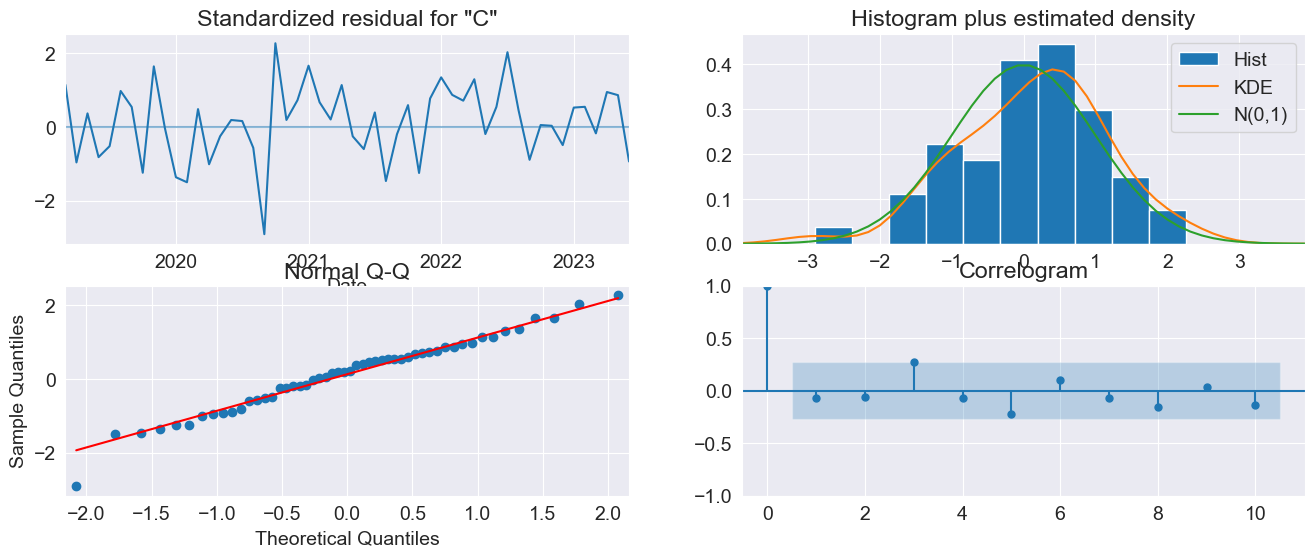

In [ ]:
dt = pd.DataFrame(country_data['ARG'])
print(dt.columns[0])
run_monthly_forecast(arima, {'arg':dt}, [])

In [ ]:
#install nbformat >= 4.2.0

#import plotly library 
import plotly.graph_objects as go
import plotly.io as pio

#create random test chart 
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(0, 100)), y=list(range(0, 100)), mode='lines', name='Inflation Rate'))
fig.update_layout(title='Inflation Rate Over Time',
                  xaxis_title='Date',
                  yaxis_title='Inflation Rate (%)')
fig.show()
simple_list = list(range(1, 101))
print(simple_list)
#create simple list of numbers 1 to 100


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
# Apply better spacing for known overlaps and avoid label collisions
manual_offsets_final = {
    "EL SALVADOR": {"yshift": 0, "xshift": 0},
    "GUATEMALA": {"yshift": -20, "xshift": -1},
    "HONDURAS": {"yshift": 10, "xshift": 0},
    "NICARAGUA": {"yshift": -10, "xshift": -1}
}

# Keep track of label positions to avoid overlap
label_positions = []

for i, country in enumerate(country_list):
    country_data = df_values_cleaned[country].dropna()
    label_text = country.upper()
    x_val = country_data.index[-1]
    y_val = country_data.iloc[-1]
    color = primary_colors[i]
    rgb = rgb_string_to_tuple(color)

    offset = manual_offsets_final.get(label_text, {})
    yshift = offset.get("yshift", 0)
    xshift = offset.get("xshift", 0)

    label_x = x_val + xshift
    label_y = y_val + yshift

    # Check for overlap and adjust yshift if needed
    for prev_x, prev_y in label_positions:
        if abs(label_x - prev_x) < 1 and abs(label_y - prev_y) < 20:
            label_y += 20  # shift down if overlap detected

    label_positions.append((label_x, label_y))

    bg_rgba = f'rgba({rgb[0]}, {rgb[1]}, {rgb[2]}, 0.12)'
    border_color = f'rgb({rgb[0]}, {rgb[1]}, {rgb[2]})'

    # Add the line trace
    fig_final_worldbank_style.add_trace(go.Scatter(
        x=country_data.index,
        y=country_data.values,
        mode='lines',
        name=label_text,
        line=dict(dash='dot', width=3, color=color),
        hoverinfo='x+y+name'
    ))

    # Simulate rounded rectangle using a shape
    fig_final_worldbank_style.add_shape(
        type="rect",
        xref="x", yref="y",
        x0=label_x - 0.5, x1=label_x + 2.5,  # adjust width as needed
        y0=label_y - 5, y1=label_y + 5,      # adjust height as needed
        line=dict(color=border_color, width=1),
        fillcolor=bg_rgba,
        layer="above",
        opacity=0.95,
        # Rounded corners (rx, ry) are supported in plotly >=5.0
        rx=6, ry=6
    )

    # Add final annotation (text) on top of the rounded rectangle
    annotations.append(dict(
        x=label_x + 1,  # center text in the rectangle
        y=label_y,
        text=label_text,
        showarrow=False,
        font=dict(color=border_color, size=13, family="Arial Black"),
        align='left',
        xanchor='center',
        bgcolor='rgba(0,0,0,0)',  # transparent, since we use a shape for background
        bordercolor='rgba(0,0,0,0)',
        borderwidth=0,
        borderpad=0,
        opacity=1
    ))


In [ ]:
// Plotly.js version of GDP per Capita Chart with Rounded Corner Labels

var traceData = [
  // Placeholder - Replace with actual country data traces as needed
];

var annotations = [
  {
    x: 2023,
    y: 8800,
    text: "COSTA RICA",
    showarrow: false,
    font: {
      color: "rgb(0,102,204)",
      size: 13,
      family: "Arial Black"
    },
    align: "left",
    xanchor: "left",
    bgcolor: "rgba(0,102,204,0.12)",
    bordercolor: "rgb(0,102,204)",
    borderwidth: 1,
    borderpad: 6,
    opacity: 0.95
  }
];

var layout = {
  title: {
    text: "GDP per Capita (constant 2015 US$) in Central America (1975–2023)",
    font: {
      size: 20,
      color: "#003893",
      family: "Arial Black"
    }
  },
  xaxis: {
    title: "Year",
    showgrid: false,
    linecolor: "black",
    tickfont: { size: 13 },
    titlefont: { size: 14, color: "black" }
  },
  yaxis: {
    title: "GDP per Capita (constant 2015 US$)",
    gridcolor: "lightgray",
    gridwidth: 1,
    tickfont: { size: 13 },
    titlefont: { size: 14, color: "black" },
    zeroline: false
  },
  plot_bgcolor: "#f0f8ff",
  paper_bgcolor: "white",
  font: { color: "black", size: 14 },
  showlegend: false,
  annotations: annotations
};

Plotly.newPlot("myDiv", traceData, layout);
